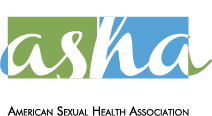

In [1]:
from IPython.display import Image
Image(filename="F:\std\logo.png", width=500, height=200)

## Overview
American Sexual Health Association (ASHA): ASHA is a forum where people discuss their sexual concerns. A lot of posts here go unreplied and also people who interact here are the ones who are afraid of approaching a doctor .

The link to the website : https://www.inspire.com/groups/american-sexual-health-association/



## Problem statement 
To increase the patient doctor interaction , the doctors wanted to know about what was discussed in the forum so that they can approach the patients .

Reading the whole portal manually is humanly impossible and a very tedious job.

## Solution:
The solution to such a problem is by using the techniques of Natural language processing . One such algorithm which can explain the major topics in the huge set of words is Topic Modeling. To build this model we need to have a text dataset .


## Dataset:  
The entire forum is scraped using web scraping libraries like selenium and beautiful soup. Each post leads to the full description which further leads to Bio information of each member .


The Information gathered are:
1. Username
2. Profile URL
3. Time of post
4. Replies
5. Bio data 

## Topic Modelling using LDA (Data Source: American sexual health association )

In [2]:
import pandas as pd
import numpy as np

The Dataset which is scraped from 'American Sexual Health Association(ASHA)' on which the Topic Modelling model is to be built is loaded into a pandas dataframe.The data set contains user posts and replies for various sexually transmitted diseases. We will use LDA to group the replies into 5 categories.

In [3]:
replies = pd.read_csv(r'F:\std\allreplies.csv')
replies = replies.head(3500)

### Overview of the dataset

In [4]:
replies.dropna()
replies.head()

,Username,Post and replies
0,Brian,"Dear members,\n\nMany of us, including myself,..."
1,yarnkitty,"As a former nurse and too frequent patient, my..."
2,bb45694,I think security should be tighter.\nOne thing...
3,Hbc2115,"Throughout my surgeries and chemo, I had very ..."
4,queencitywalker,"Patient centered, not dollar centered.\nSmalle..."


In [5]:
replies['Post and replies'][350]
replies['Post and replies']= replies['Post and replies'].str.replace("http", " ", case = False) 
replies['Post and replies']= replies['Post and replies'].str.replace("www", " ", case = False) 
replies['Post and replies']= replies['Post and replies'].str.replace("org", " ", case = False) 
replies['Post and replies']= replies['Post and replies'].str.replace("https", " ", case = False)
replies['Post and replies']= replies['Post and replies'].str.replace("ashasexualhealth", " ", case = False)
replies['Post and replies']= replies['Post and replies'].str.replace("thanks", " ", case = False)
replies['Post and replies']= replies['Post and replies'].str.replace("don", " ", case = False)


Some of the frequently repeating words which does not add value to the topics are removed.
### Creating a  vocabulary of all the words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(replies['Post and replies'].values.astype('U'))

In the script above we use the CountVectorizer class from the sklearn.feature_extraction.text module to create a document-term matrix. We specify to only include those words that appear in less than 80% of the document and appear in at least 2 documents. We also remove all the stop words as they do not really contribute to topic modeling.

Now let's look at our document term matrix
### Document Term matrix 

In [7]:
doc_term_matrix

<3500x6708 sparse matrix of type '<class 'numpy.int64'>'
	with 101797 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

Our vocabulary has 101797 words

### Using LDA to create topics
Next, we will use LDA to create topics along with the probability distribution for each word in our vocabulary for each topic.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In the script above we use the LatentDirichletAllocation class from the sklearn.decomposition library to perform LDA 
on our document-term matrix. The parameter n_components specifies the number of categories, or topics,that we want our text 
to be divided into.

### Fetching Random words from our Vocabulary
The following script randomly fetches 10 words from our vocabulary

In [10]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]

cluster
lets
esteem
friendship
accounts
anxiety
awhile
hose
untreated
estimate


Let's find 10 words with the highest probability for the first topic. To get the first topic, we can use the
components_ attribute and pass a 0 index as the value.

In [11]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])
    

did
time
know
told
feel
herpes
life
just
like
nan


In [12]:
top_topic_words = first_topic.argsort()[-10:]

These indexes can then be used to retrieve the value of the words from the count_vect object, which can be done like this

The words show that the first topic might be about herpes and feeling low due to its existence.

### Finding words with highest probabilities in all the topics 
Let's print the 10 words with highest probabilities for all the five topics

In [13]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['did', 'time', 'know', 'told', 'feel', 'herpes', 'life', 'just', 'like', 'nan']


Top 10 words for topic #1:
['ve', 'symptoms', 'years', 'people', 'like', 'time', 'test', 'just', 'know', 'hpv']


Top 10 words for topic #2:
['health', 'transmission', 'check', 'sex', 'stdsstis', 'oral', 'genital', 'risk', 'hsv', 'herpes']


Top 10 words for topic #3:
['cancer', 'know', 'support', 'members', 'post', 'just', 'people', 'like', 'thank', 'inspire']


Top 10 words for topic #4:
['new', 'dr', 'treatment', 'pain', 'care', 'doctors', 'doctor', 'patients', 'medical', 'patient']




### Relevant Description
Topic 0 :Discussions about herpes (most prevelant disease)<br>
Topic 1 :Discussions about HPV(human papillomavirus)<br>
Topic 2 :Discussions on transmission mode of the herpes virus<br>
Topic 3 :Discussions about the forum(Inspire)(American Sexual health association)<br>
Topic 4 :Discussions about doctors,patients and treatments
        

As a final step, we will add a column to the original data frame that will store the topic for the text. To do so, we can use
LDA.transform() method and pass it our document-term matrix. This method will assign the probability of all the topics to 
each document.

In [14]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(3500, 5)

The following script adds a new column for topic in the data frame and assigns the topic value to each row in the column

In [15]:
replies['Topic'] = topic_values.argmax(axis=1)

In [16]:
replies.to_csv(r'F:\std\topic_all_replies_LDA.csv')

### Topics assigned to each post

In [17]:
replies.head()

,Username,Post and replies,Topic
0,Brian,"Dear members,\n\nMany of us, including myself,...",3
1,yarnkitty,"As a former nurse and too frequent patient, my...",4
2,bb45694,I think security should be tighter.\nOne thing...,0
3,Hbc2115,"Throughout my surgeries and chemo, I had very ...",4
4,queencitywalker,"Patient centered, not dollar centered.\nSmalle...",4
